**Assignment 1 - Data Wrangling II**

Create an "Academic performance" dataset of students and perform the following operations using Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.

Reason and document your approach properly.

---

**Code**

0. Creating an "Academic performance" dataset

In [1]:
import pandas, numpy, seaborn

# create dataset
count = 8000
d = pandas.DataFrame({
	"roll_no": range(1001, 1001 + count),
	"in_sem_marks": numpy.random.uniform(low=0.0, high=30.0, size=(count,)),
	"end_sem_marks": numpy.random.uniform(low=0.0, high=70.0, size=(count,)),
	"passed": [False] * (count)
})
d.passed.where(~((d.in_sem_marks >= 12.0) & (d.end_sem_marks >= 24.0)), other=True, inplace=True)

# create NaNs
d.mask(numpy.random.random(d.shape) < .01, inplace=True)

# create outliers
d.in_sem_marks.mask(numpy.random.random(d.in_sem_marks.shape) < .01, other=numpy.random.uniform(low=30.0, high=70.0), inplace=True)
d.in_sem_marks.mask(numpy.random.random(d.in_sem_marks.shape) < .01, other=numpy.random.uniform(low=-30.0, high=0.0), inplace=True)
d.end_sem_marks.mask(numpy.random.random(d.end_sem_marks.shape) < .01, other=numpy.random.uniform(low=70.0, high=100.0), inplace=True)
d.end_sem_marks.mask(numpy.random.random(d.end_sem_marks.shape) < .01, other=numpy.random.uniform(low=-70.0, high=0.0), inplace=True)

d

,roll_no,in_sem_marks,end_sem_marks,passed
0,1001.0,14.193856,23.158413,False
1,1002.0,6.966616,45.649487,False
2,1003.0,15.854644,58.678535,True
3,1004.0,29.782157,13.913144,False
4,1005.0,9.932414,NaN,False
...,...,...,...,...
7995,8996.0,5.330935,65.621953,False
7996,8997.0,15.234899,69.084823,True
7997,8998.0,10.461998,13.221654,False
7998,8999.0,28.812874,48.406153,True


1. Fixing missing values

In [2]:
# Count of null values
d.isnull().sum()

roll_no          77
in_sem_marks     79
end_sem_marks    63
passed           74
dtype: int64

In [3]:
# Drop rows without roll no
d.drop(d[d.roll_no.isnull()].index, inplace=True)
d.reset_index(drop=True, inplace=True)

# Default values for null marks
d.in_sem_marks.fillna(12.0, inplace=True)
d.end_sem_marks.fillna(24.0, inplace=True)

# Calculated values for passed boolean
d.passed.fillna(False, inplace=True)
d.passed.where(~((d.in_sem_marks >= 12.0) & (d.end_sem_marks >= 24.0)), other=True, inplace=True)

d

,roll_no,in_sem_marks,end_sem_marks,passed
0,1001.0,14.193856,23.158413,False
1,1002.0,6.966616,45.649487,False
2,1003.0,15.854644,58.678535,True
3,1004.0,29.782157,13.913144,False
4,1005.0,9.932414,24.000000,False
...,...,...,...,...
7918,8996.0,5.330935,65.621953,False
7919,8997.0,15.234899,69.084823,True
7920,8998.0,10.461998,13.221654,False
7921,8999.0,28.812874,48.406153,True


2. Fix outliers

<AxesSubplot: >

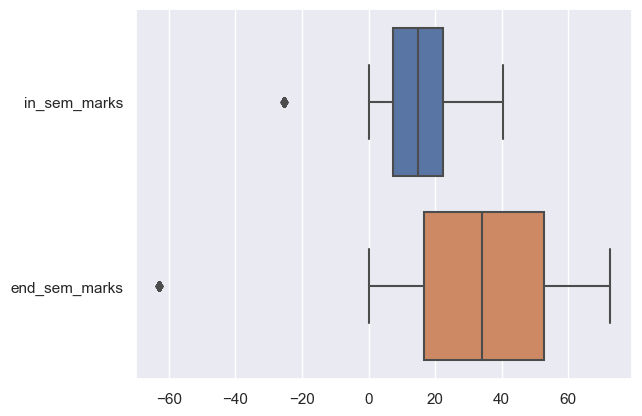

In [4]:
seaborn.set_theme()
seaborn.boxplot(d.drop(["roll_no", "passed"], axis=1), orient="h")

In [5]:
# Negative marks
d.in_sem_marks.where(~(d.in_sem_marks < 0), other=(-1.0 * d.in_sem_marks), inplace=True)
d.end_sem_marks.where(~(d.end_sem_marks < 0), other=(-1.0 * d.end_sem_marks), inplace=True)

# Greater than maximum marks
d.in_sem_marks.where(~(d.in_sem_marks > 30.0), other=(30 * d.in_sem_marks / 70.0), inplace=True)
d.end_sem_marks.where(~(d.end_sem_marks > 70.0), other=(70 * d.end_sem_marks / 100.0), inplace=True)

# Recalculated values for passed boolean
d.passed.fillna(False, inplace=True)
d.passed.where(~((d.in_sem_marks >= 12.0) & (d.end_sem_marks >= 24.0)), other=True, inplace=True)

d

,roll_no,in_sem_marks,end_sem_marks,passed
0,1001.0,14.193856,23.158413,False
1,1002.0,6.966616,45.649487,False
2,1003.0,15.854644,58.678535,True
3,1004.0,29.782157,13.913144,False
4,1005.0,9.932414,24.000000,False
...,...,...,...,...
7918,8996.0,5.330935,65.621953,False
7919,8997.0,15.234899,69.084823,True
7920,8998.0,10.461998,13.221654,False
7921,8999.0,28.812874,48.406153,True


3. Data transformations

In [6]:
# converting marks to percentages
d.in_sem_marks = d.in_sem_marks.apply(lambda x : 100.0 * x / 30.0)
d.end_sem_marks = d.end_sem_marks.apply(lambda x : 100.0 * x / 70.0)

d

,roll_no,in_sem_marks,end_sem_marks,passed
0,1001.0,47.312853,33.083447,False
1,1002.0,23.222053,65.213552,False
2,1003.0,52.848814,83.826478,True
3,1004.0,99.273857,19.875920,False
4,1005.0,33.108046,34.285714,False
...,...,...,...,...
7918,8996.0,17.769784,93.745648,False
7919,8997.0,50.782995,98.692604,True
7920,8998.0,34.873325,18.888078,False
7921,8999.0,96.042914,69.151648,True


<AxesSubplot: >

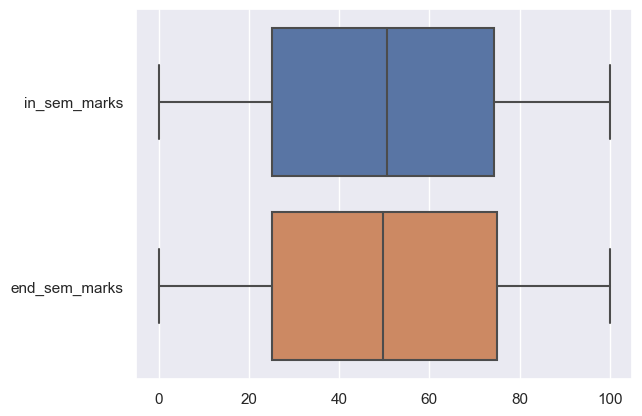

In [7]:

seaborn.boxplot(d.drop(["roll_no", "passed"], axis=1), orient="h")

In [8]:
d.describe()

,roll_no,in_sem_marks,end_sem_marks
count,7923.000000,7923.000000,7923.000000
mean,4998.130254,50.035144,49.937462
std,2307.853255,28.621615,28.904704
min,1001.000000,0.008462,0.023864
25%,2997.500000,25.142370,25.024662
50%,4998.000000,50.617073,49.682211
75%,6996.500000,74.323007,74.966882
max,9000.000000,99.958935,99.976065
